# Exercice 0: EDA

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [96]:
import requests
# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')


Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv


### Data analysis

In [97]:
display(df_train)

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
id                                                                        
254              2             1           4.0           1       1977.0   
1066             1             1           5.0           1       1983.0   
638              4             1          10.0           1       1998.0   
799              3             1           8.0           0       1916.0   
380              2             1           5.0           0       2005.0   
...            ...           ...           ...         ...          ...   
1095             4             1           7.0           0         -1.0   
1130             3             1           6.0           0       1964.0   
1294             3             1           7.0           1       1996.0   
860              3             1           6.0           1       1966.0   
1126             4             1           9.0           1       1932.0   

     GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
id                                                                    
254         two         440           0           55              0   
1066        two         612         349           40              0   
638         two         420         144          123              0   
799         one         180           0            0              0   
380         two         438         108            0              0   
...         ...         ...         ...          ...            ...   
1095       zero           0           0          192              0   
1130        two         504           0            0              0   
1294      three         889         220            0              0   
860         two         453         188          108              0   
1126        two         360           0            0              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
id                                                                          
254           0          165         0        0       7  2010.0     127500  
1066          0            0         0        0       9  2009.0     316600  
638           0            0         0        0       7  2006.0     258000  
799         140            0         0        0       8  2009.0     135000  
380           0            0         0        0       3  2006.0     167240  
...         ...          ...       ...      ...     ...     ...        ...  
1095          0            0         0        0      11  2008.0     130000  
1130          0            0         0        0       7  2008.0     145000  
1294          0            0         0        0       7  2009.0     265000  
860           0            0         0        0       7  2006.0     155000  
1126          0            0         0        0       7  2006.0     239000  

[1168 rows x 17 columns]

In [98]:
#Function for EDA
def eda(data):
    print("\n", "Dataset structure:")
    print("Shape (rows, columns):", data.shape, "\n")
    print("Variable name:", data.columns.tolist(), "\n")
    print("Variables data types:")
    print(data.dtypes, "\n")

    print("General info:")
    print(data.info(), "\n")

    print("Data quality:")
    print("Missing values:")
    print(data.isnull().sum())

    # Descriptive statistics
    print("Descriptive statistics:")
    print(data.describe(), "\n")
    print("Medians of each variable:")
    print(data.median(numeric_only=True), "\n")

    print("Standard deviations of each variable:")
    print(data.std(numeric_only=True), "\n")

eda(df_train)




 Dataset structure:
Shape (rows, columns): (1168, 17) 

Variable name: ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

Variables data types:
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd     float64
Fireplaces         int64
GarageYrBlt      float64
GarageCars        object
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold           float64
SalePrice          int64
dtype: object 

General info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1

In [99]:
display(df_train[df_train.isnull().any(axis=1)])
df_train=df_train.dropna() # On efface les valeurs Nan 

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
id                                                                        
1189             3             1           6.0           0       1966.0   
135              2             1           6.0           0       1981.0   
321              2             1           NaN           1       1948.0   

     GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
id                                                                    
1189        NaN         408           0            0              0   
135         one         308           0          176              0   
321         one         240           0          130              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
id                                                                          
1189          0            0         0        0      12  2008.0     109900  
135           0            0         0        0       6     NaN     120000  
321           0            0         0        0      11  2007.0     119200

In [100]:
var_num = []
var_cat = []

for col in df_train.columns:
    if pd.api.types.is_numeric_dtype(df_train[col]):
        var_num.append(col)
    elif pd.api.types.is_categorical_dtype(df_train[col]) or df_train[col].dtype == "object":
        var_cat.append(col)
    else:
        var_other.append(col)

print("Variables numériques :", var_num)
print("Variables catégorielles :", var_cat)

Variables numériques : ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Variables catégorielles : ['GarageCars']


/var/folders/kz/yn6r06915yl8rm1zpm_51j800000gn/T/ipykernel_53492/3671611728.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df_train[col]) or df_train[col].dtype == "object":


In [101]:
#Remapping des valuers dans GarageCars 
df_train["GarageCars"] = df_train["GarageCars"].map({ "zero":0,"one":1, "two":2,"three":3,'four':4})


In [102]:

columns=df_train.columns
y=["SalePrice"]
numeric_cols=columns.copy().drop(["GarageCars","SalePrice"])

print("y :",y)
print("Toutes les variables:",columns)
print("Variables réels :",numeric_cols)

y : ['SalePrice']
Toutes les variables: Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Variables réels : Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


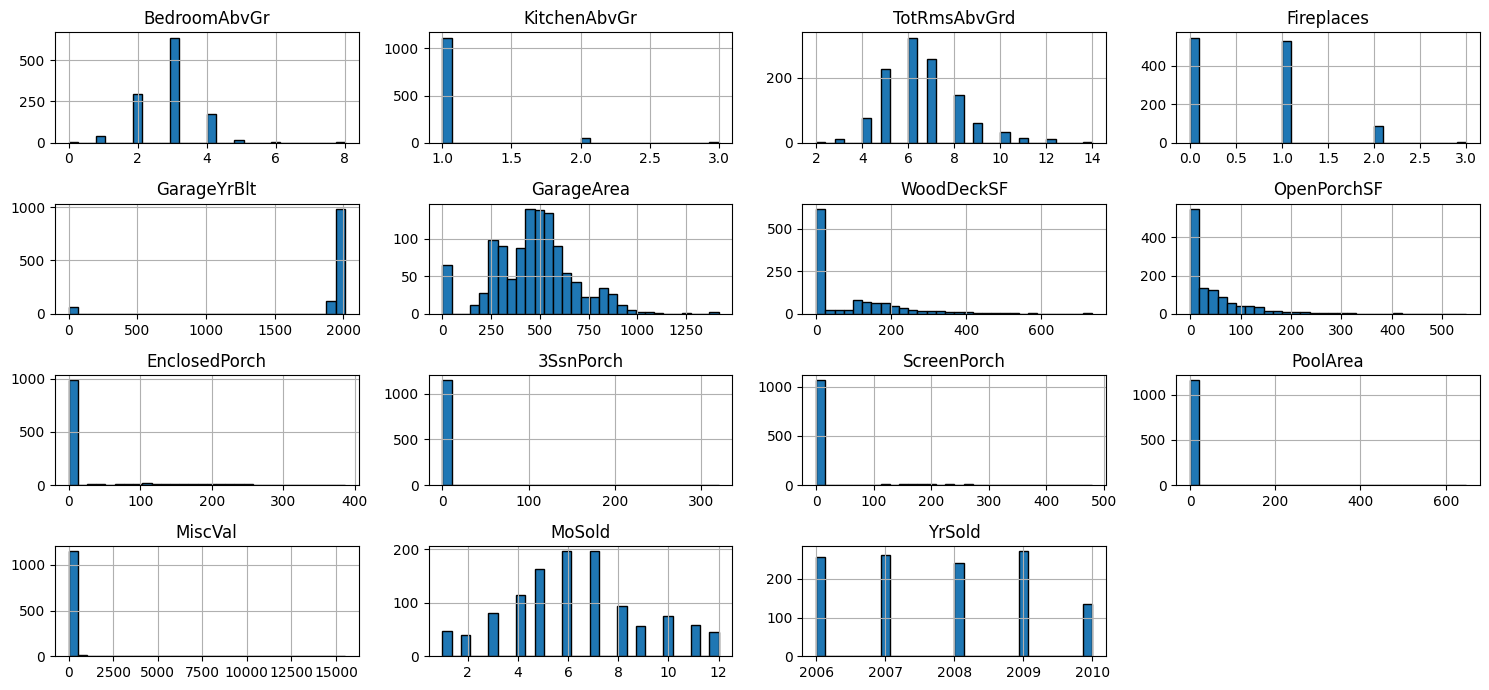

BedroomAbvGr
3    638
2    292
4    171
1     38
5     18
6      5
0      2
8      1
Name: count, dtype: int64
KitchenAbvGr
1    1116
2      47
3       2
Name: count, dtype: int64
TotRmsAbvGrd
6.0     324
7.0     259
5.0     227
8.0     148
4.0      77
9.0      59
10.0     33
11.0     14
3.0      12
12.0     10
2.0       1
14.0      1
Name: count, dtype: int64
Fireplaces
0    547
1    529
2     87
3      2
Name: count, dtype: int64
GarageYrBlt
-1.0       65
 2005.0    52
 2006.0    48
 2007.0    41
 2004.0    37
           ..
 1918.0     1
 1906.0     1
 1924.0     1
 1908.0     1
 1932.0     1
Name: count, Length: 98, dtype: int64
GarageCars
2    662
1    296
3    140
0     65
4      2
Name: count, dtype: int64
GarageArea
0       65
440     40
576     36
528     31
484     31
        ..
813      1
1052     1
479      1
706      1
889      1
Name: count, Length: 386, dtype: int64
WoodDeckSF
0      613
192     30
120     27
144     25
100     25
      ... 
426      1
421      1
474     

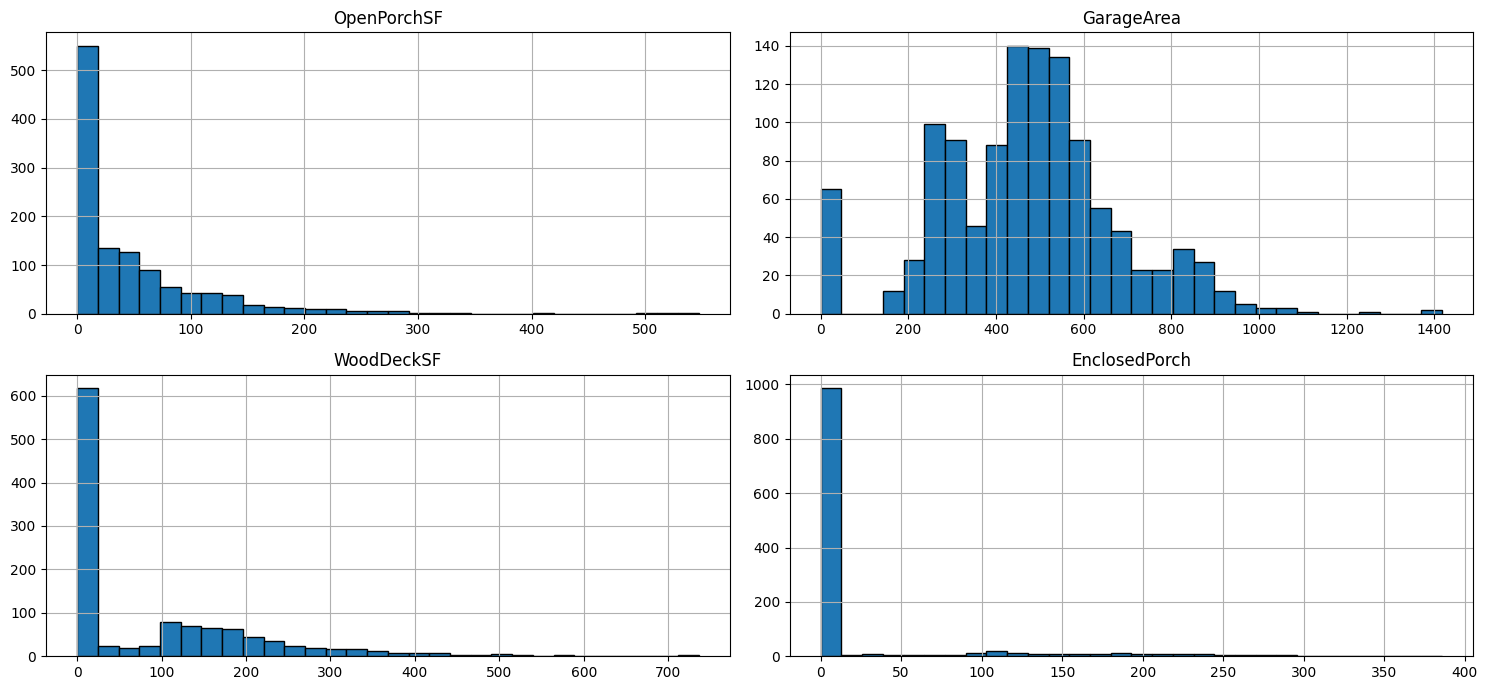

In [103]:
df_train[numeric_cols].hist(figsize=(15, 7), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()
for col in columns: 
    print(df_train[col].value_counts())
cols_chelou=["OpenPorchSF","GarageArea","WoodDeckSF","EnclosedPorch"]
df_train[numeric_cols].hist(figsize=(15, 7), bins=30, edgecolor='black', column=cols_chelou)
plt.tight_layout()
plt.show()




Box plots to check for outliers:


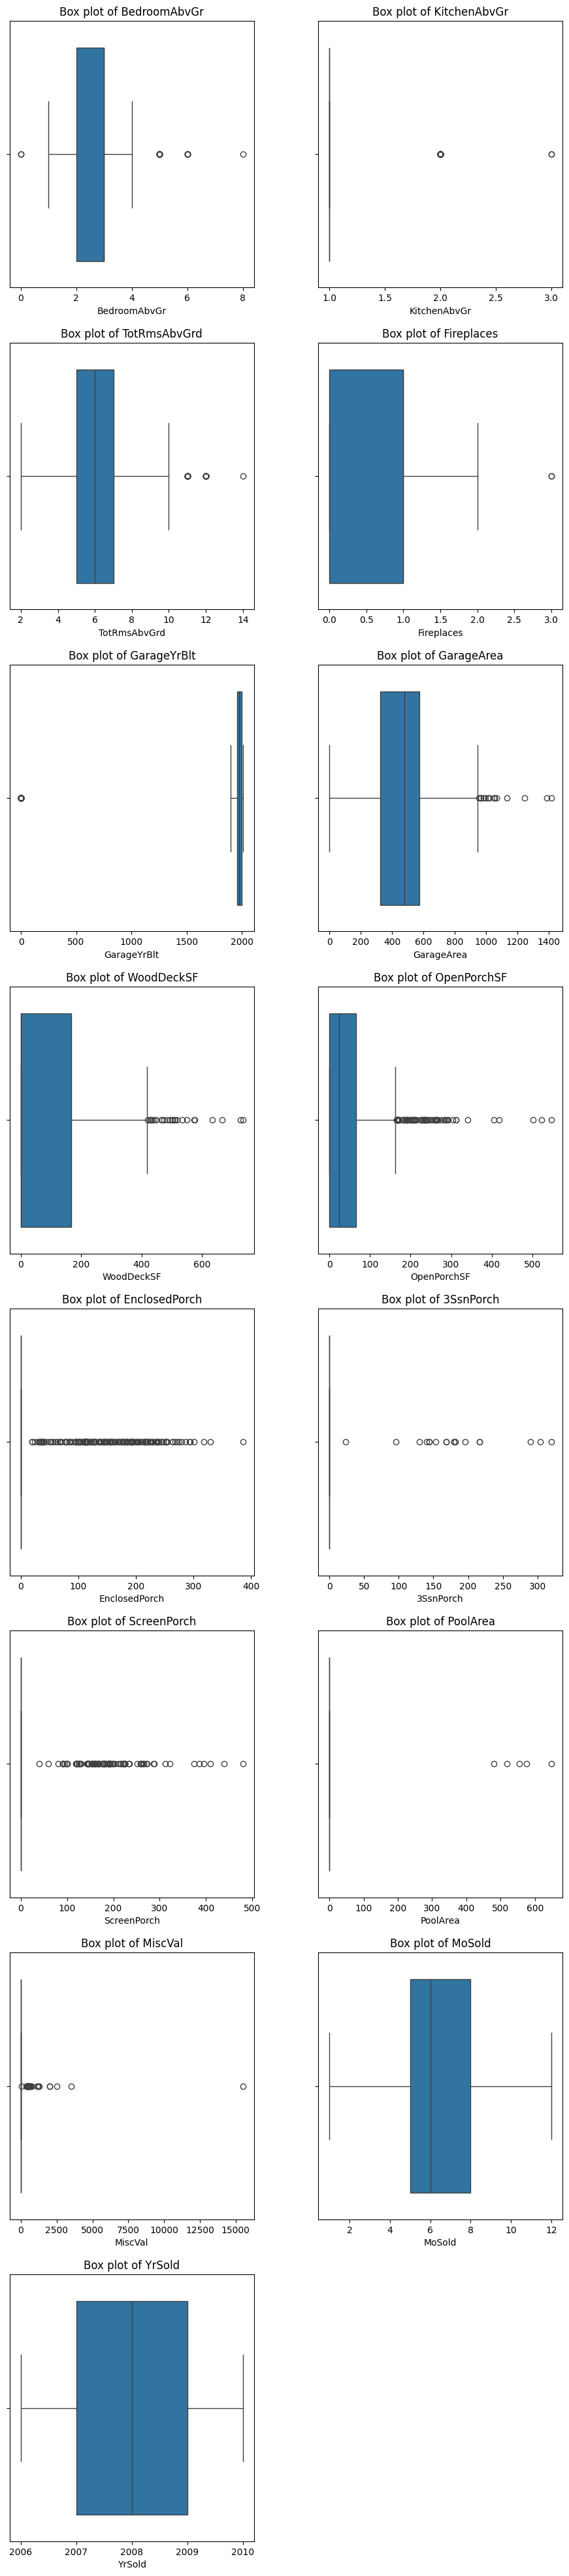

In [104]:
# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")


# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df_train[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()



BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
id                                                                        
221              3             1           6.0           0         -1.0   
785              4             1           7.0           0         -1.0   
1174             3             1           7.0           0         -1.0   
199              2             1           6.0           0         -1.0   
764              4             2           9.0           0         -1.0   
...            ...           ...           ...         ...          ...   
647              2             3           8.0           0         -1.0   
241              4             2           8.0           0         -1.0   
1337             3             1           5.0           1         -1.0   
1215             4             1           7.0           0         -1.0   
1095             4             1           7.0           0         -1.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
id                                                                     
221            0           0          36           56              0   
785            0           0           0            0            138   
1174           0           0           0            0            144   
199            0           0           0            0            156   
764            0           0           0           70              0   
...          ...         ...         ...          ...            ...   
647            0           0           0            0            102   
241            0           0          32           45              0   
1337           0           0           0            0              0   
1215           0           0           0           98              0   
1095           0           0           0          192              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
id                                                                          
221           0            0         0        0       7  2006.0      84500  
785           0            0         0        0       6  2006.0     102000  
1174          0            0         0        0       8  2007.0     115000  
199           0            0         0        0      10  2009.0      85000  
764           0            0         0        0       9  2008.0     145900  
...         ...          ...       ...      ...     ...     ...        ...  
647           0            0         0        0       6  2009.0     113000  
241           0            0         0        0       9  2009.0     136000  
1337          0            0         0        0       4  2010.0     115000  
1215          0            0         0        0       9  2008.0      79900  
1095          0            0         0        0      11  2008.0     130000  

[65 rows x 17 columns]

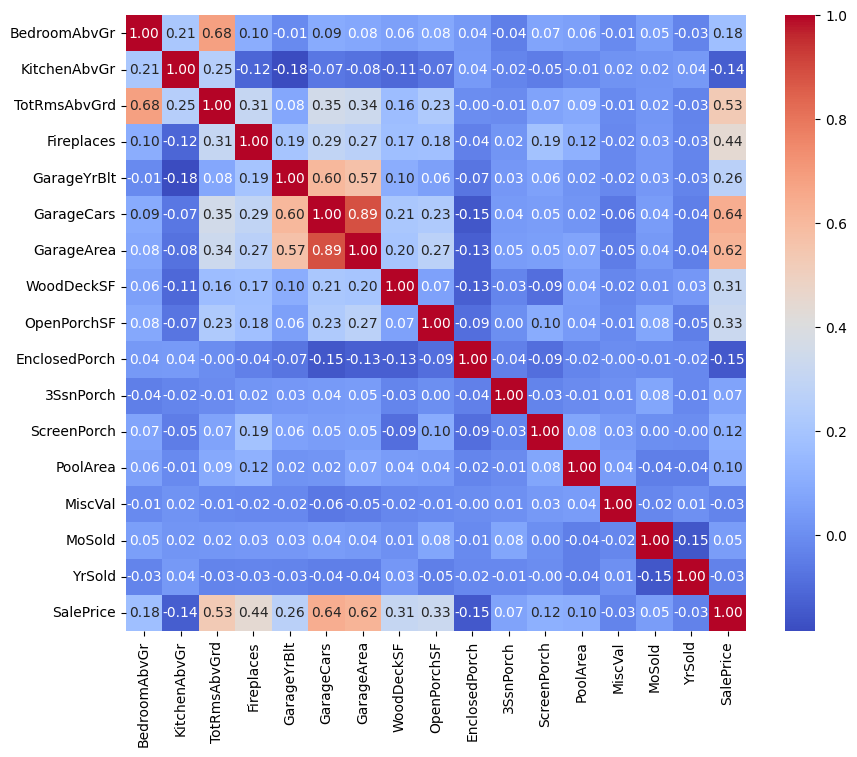


Important correlations with 'SalePrice':


Text(0.5, 1.0, 'Top Negative Correlations')

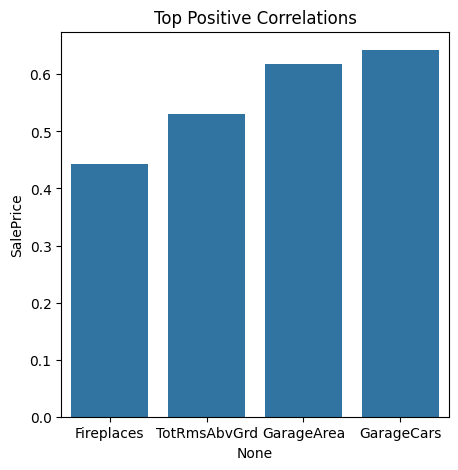

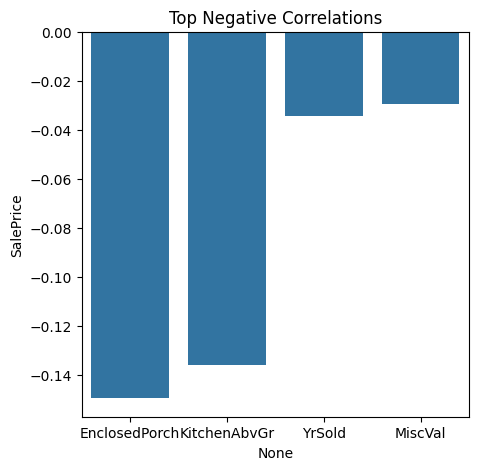

In [105]:
## Traitement des outliers
display(df_train[df_train["GarageYrBlt"]<500])

corr_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
print("\nImportant correlations with 'SalePrice':")
corrs = df_train.corr().sort_values(by=['SalePrice'])['SalePrice'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")


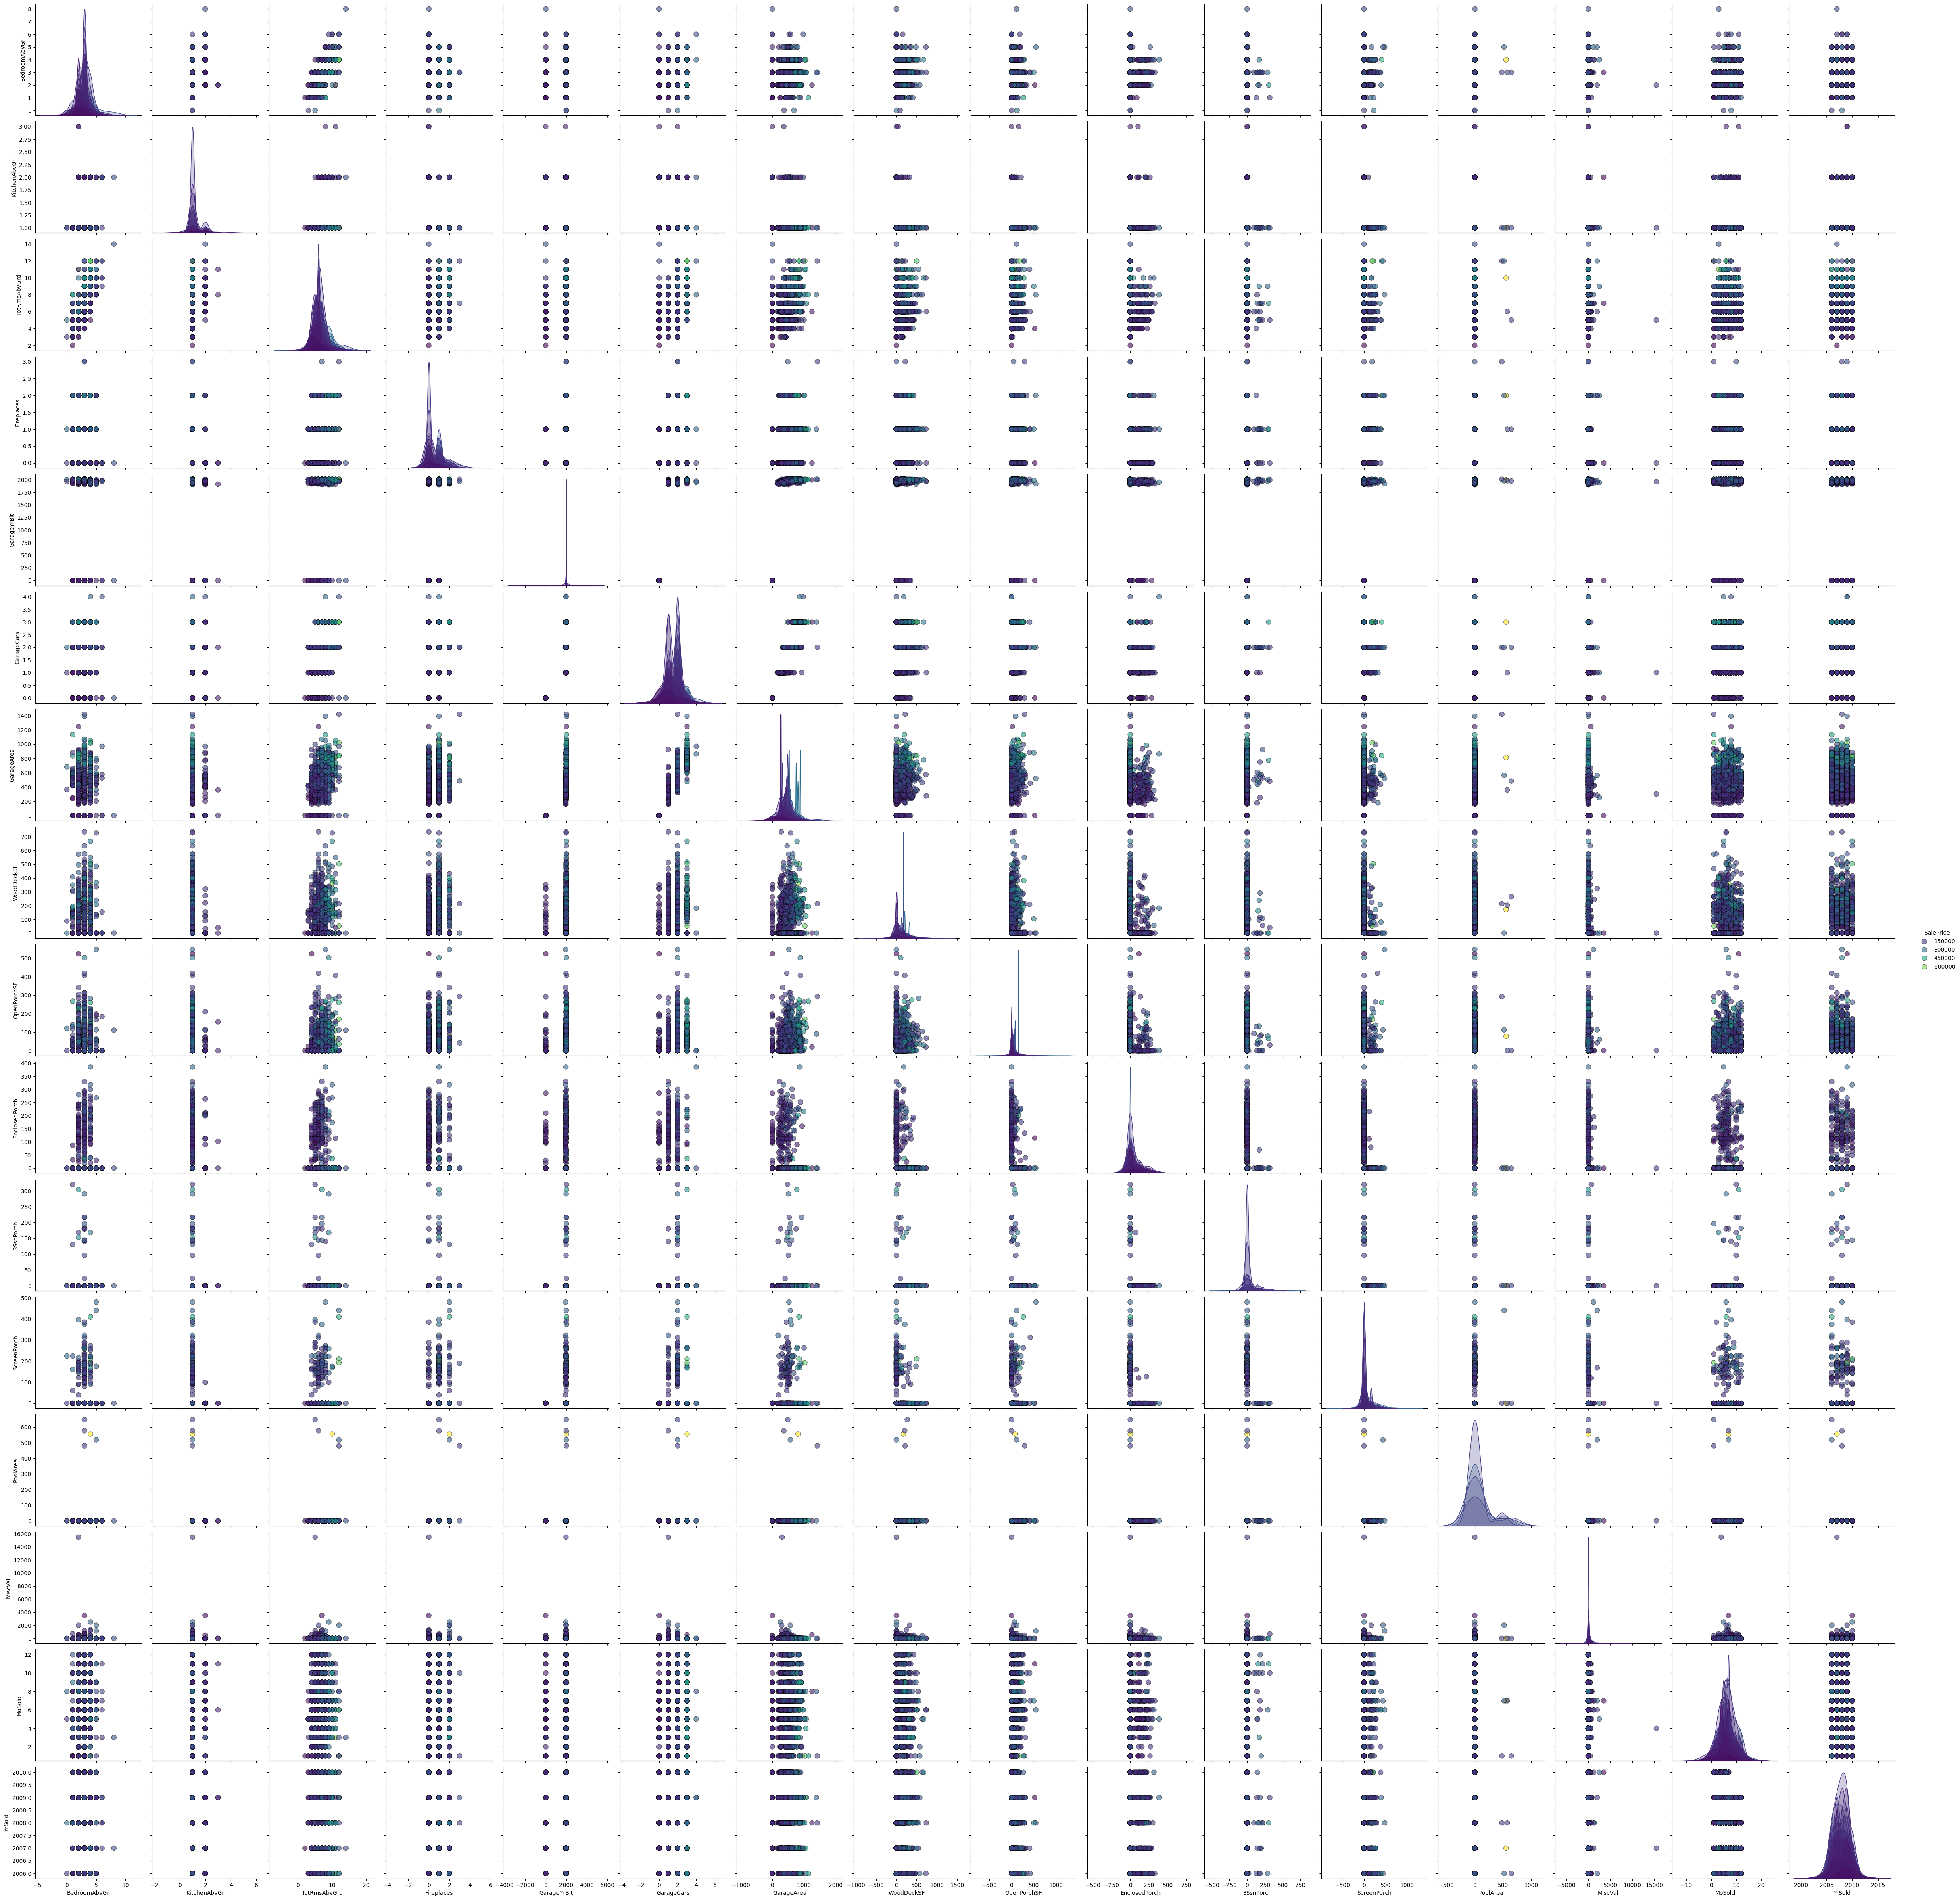

In [106]:
# Creating pairplot
sns.pairplot(df_train[columns], hue='SalePrice', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()

# Exercice 1

### Data Preprocessing

In [107]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

In [108]:
def pipeline(df):
    df=df.dropna() #On enlève les NaN
    df["GarageCars"] = df["GarageCars"].map({ "zero":0,"one":1, "two":2,"three":3,'four':4}) #On remappe la col qui posait problème
    df = df[df["GarageYrBlt"] >= 500] #Dans l'eda on a vu qu'il y'a 65 valeurs aberrantes dans cette colonne
    return df

df_train=pipeline(df_train)

/var/folders/kz/yn6r06915yl8rm1zpm_51j800000gn/T/ipykernel_53492/513891492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GarageCars"] = df["GarageCars"].map({ "zero":0,"one":1, "two":2,"three":3,'four':4}) #On remappe la col qui posait problème


In [109]:
display(df_train)

BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
id                                                                        
254              2             1           4.0           1       1977.0   
1066             1             1           5.0           1       1983.0   
638              4             1          10.0           1       1998.0   
799              3             1           8.0           0       1916.0   
380              2             1           5.0           0       2005.0   
...            ...           ...           ...         ...          ...   
1044             3             1           8.0           1       2003.0   
1130             3             1           6.0           0       1964.0   
1294             3             1           7.0           1       1996.0   
860              3             1           6.0           1       1966.0   
1126             4             1           9.0           1       1932.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
id                                                                     
254            2         440           0           55              0   
1066           2         612         349           40              0   
638            2         420         144          123              0   
799            1         180           0            0              0   
380            2         438         108            0              0   
...          ...         ...         ...          ...            ...   
1044           3         871         320           62              0   
1130           2         504           0            0              0   
1294           3         889         220            0              0   
860            2         453         188          108              0   
1126           2         360           0            0              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
id                                                                          
254           0          165         0        0       7  2010.0     127500  
1066          0            0         0        0       9  2009.0     316600  
638           0            0         0        0       7  2006.0     258000  
799         140            0         0        0       8  2009.0     135000  
380           0            0         0        0       3  2006.0     167240  
...         ...          ...       ...      ...     ...     ...        ...  
1044          0            0         0        0       8  2008.0     284000  
1130          0            0         0        0       7  2008.0     145000  
1294          0            0         0        0       7  2009.0     265000  
860           0            0         0        0       7  2006.0     155000  
1126          0            0         0        0       7  2006.0     239000  

[1100 rows x 17 columns]

In [110]:
df_train.columns

Index(['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [111]:
X=df_train[['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]
y=df_train["SalePrice"]

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model Building and Evaluation

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#Evaluate model

def pred_eval(model, X_data, y_target):
    y_pred = model.predict(X_data)
    mean_abs_error = mean_absolute_error(y_target, y_pred)
    mse = mean_squared_error(y_target, y_pred)
    rmse = np.sqrt(mse)
    print("Mean abs error of the model:", mean_abs_error)
    print("Mean squared error of the model:", mse)
    print("Root Mean Squared Error of the model:", rmse)
    return y_pred

In [138]:
y_pred=pred_eval(model, X_train, y_train)

Mean abs error of the model: 31152.416432923983
Mean squared error of the model: 1928157813.3528054
Root Mean Squared Error of the model: 43910.79381374021


In [136]:
# Predict and eval on the test data
y_pred = pred_eval(model, X_test, y_test)

Mean abs error of the model: 32387.5432606361
Mean squared error of the model: 2834779088.0671883


### Generating Submission File

In [ ]:
X_test =  pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')

In [ ]:
submission = pd.DataFrame({
    'id': X_test.index,
    'SalePrice': 0 # your_prediction
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()